PA2 Notebook 2b: HUC10 & HUC08 Stashed code
===

Old code extracted from `stage2/PA2_2b_AggregateAttenuated.ipynb`.

Implemented similar to early 2023 method for HUC12 Attenuated Outlet Loads, that only assum a single outlet

# Installation and Setup

Carefully follow our **[Installation Instructions](README.md#get-started)**, especially including:
- Creating a virtual environment for this repository (step 3)

## Import Python Dependencies

In [1]:
from pathlib import Path
from importlib import reload

import numpy     as np
import pandas    as pd
import geopandas as gpd

import hvplot.pandas
import holoviews as hv
import geoviews as gv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
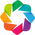

In [2]:
# Custom functions for Pollution Assessment
import pollution_assessment as pa

## Set Paths


In [3]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment')

In [4]:
# Assign a path for the geographies folder.
geography_path = project_path / 'geography/'

In [5]:
# Assign a path for the data OUTPUT folder.
data_output_path = project_path / 'stage2/data_output/'

# Import Data

## Open Files for Geographies

In [6]:
%%time
# read geometry data from GeoParquet files
# huc12_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc12_outlets_drwi_gdf.parquet')
huc10_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc10_outlets_drwi_gdf.parquet')
huc08_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc08_outlets_drwi_gdf.parquet')

# new inlet data
# huc12_in_outlets_drwi_gdf = gpd.read_parquet(geography_path /'huc12_in_outlets_drwi_gdf.parquet')

CPU times: user 122 ms, sys: 22.2 ms, total: 144 ms
Wall time: 153 ms


## Open Files from Notebook 2

In [7]:
# Results by COMID
reach_concs_gdf = gpd.read_parquet(data_output_path /'reach_concs_gdf.parquet')
# catch_loads_gdf = gpd.read_parquet(data_output_path /'catch_loads_gdf.parquet')

# Aggregation by HUC, using Method 1 (Sum of Local Loads) similar to PA1
# huc12_load_gdf = gpd.read_parquet(data_output_path /'huc12_load_gdf.parquet')
huc10_load_gdf = gpd.read_parquet(data_output_path /'huc10_load_gdf.parquet')
huc08_load_gdf = gpd.read_parquet(data_output_path /'huc08_load_gdf.parquet')

# Method 2: Aggregate Attenuated reach loads accumulated through the stream network

Back-calculate cumulative attenuated stream reach loads (kg/y) from excess & remaining average annual concentrations (mg/L) and mean annual flow (CFS)), using:

```
tp_load_atten = (tp_conc * 28.3168 / 1000000) * (maflowv * 31557600)
```

Where:  
- 28.3168 liters in a cubic foot
- 1000000 mg in a kg
- 31557600 = 365.25 * 24 * 60 * 60 seconds per year

# HUC10 Attenuated Outlet Loads, old approach
Implemented similar to early 2023 method for HUC12 Attenuated Outlet Loads, that only assum a single outlet


In [8]:
# Create dataframe for HUC08 loads (blank for now)
huc10_outlet_loads_gdf = huc10_outlets_drwi_gdf.copy(deep=True)

In [9]:
# Select results at HUC10 outlets, and change index to HUC10
reach_concs_huc10_gdf = reach_concs_gdf.loc[
    huc10_outlets_drwi_gdf.comid.dropna()
].set_index('huc10')
# Remove COMID geometries
reach_concs_huc10_gdf.drop('geometry', axis='columns', inplace=True)

In [10]:
# Add HUC10 metadata from outlet COMIDs in PA2 Reach Results
vars_int = ['nordstop', 'streamorder',  ]
# Recast to Pandas nullable integer type to avoid auto-recast to float
for var in vars_int:
    huc10_outlet_loads_gdf[f'{var}'] = reach_concs_huc10_gdf[f'{var}'].astype(pd.Int64Dtype())

vars_other = ['maflowv',]
for var in vars_other:
    huc10_outlet_loads_gdf[f'{var}'] = reach_concs_huc10_gdf[f'{var}']

In [11]:
# Add PA2 Reach Results from outlets to HUC12 GDF
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc10_outlet_loads_gdf[f'{pollutant}_conc{suffix}'] = (
            reach_concs_huc10_gdf[f'{pollutant}_conc{suffix}']
        )

In [12]:
# Back calculate Loads (kg/y) from average annual concentrations (mg/L) 
# and mean annual flow (CFS))
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc10_outlet_loads_gdf[f'{pollutant}_load{suffix}'] = (
            (huc10_outlet_loads_gdf[f'{pollutant}_conc{suffix}'] * 28.3168 / 1000000)
            * huc10_outlet_loads_gdf.maflowv * 31557600
        )

In [13]:
# Calc and add load reductions
for pollutant in ['tn', 'tp', 'tss']:
    huc10_outlet_loads_gdf[f'{pollutant}_load_red3'] = (
        huc10_outlet_loads_gdf[f'{pollutant}_load_xsnps'] 
        - huc10_outlet_loads_gdf[f'{pollutant}_load_rem3']
    )

In [14]:
huc10_outlet_loads_gdf

,huc10_name,geometry,comid,nord,in_drb,huc08,nordstop,streamorder,maflowv,tn_conc,...,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3,tn_load_avoid,tp_load_avoid,tss_load_avoid,tn_load_red3,tp_load_red3,tss_load_red3
huc10,,,,,,,,,,,,,,,,,,,,,
0204010101,Upper West Branch Delaware River,"POLYGON ((-8304262.020 5228828.467, -8304276.2...",2612826,74277,True,02040101,74310,3,249.949,0.583135,...,-4.744983e+07,-9.262312e+05,-11043.478466,-4.744983e+07,0.0,0.0,0.0,0.000000,0.000000,0.000000
0204010102,Middle West Branch Delaware River,"POLYGON ((-8346041.487 5210211.202, -8345991.9...",2614138,74141,True,02040101,74452,4,486.135,0.922010,...,-9.341380e+07,-1.695335e+06,-30768.534458,-9.341380e+07,0.0,0.0,0.0,0.000000,0.000000,0.000000
0204010103,Lower West Branch Delaware River,"POLYGON ((-8386125.641 5192313.974, -8386205.0...",2617290,73934,True,02040101,74522,4,881.917,0.718986,...,-1.747651e+08,-3.203011e+06,-58154.495120,-1.747683e+08,0.0,0.0,0.0,66.555827,44.433876,6384.339133
0204010104,Upper Delaware River,"POLYGON ((-8358825.391 5150856.311, -8358625.2...",2616816,73702,True,02040101,73742,3,46.467,0.358229,...,-8.926194e+06,-1.816176e+05,-2235.265279,-8.928247e+06,0.0,0.0,0.0,27.596969,20.387760,2052.995258
0204010105,Middle Delaware River,"POLYGON ((-8329217.537 5136231.813, -8329266.5...",2617486,73565,True,02040101,74971,5,2731.678,0.498726,...,-5.454072e+08,-1.038475e+07,-186696.586115,-5.454187e+08,0.0,0.0,0.0,203.808124,95.154961,13853.236510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0204030107,Manahawkin Bay-Little Egg Harbor,"POLYGON ((-8254906.642 4818531.173, -8255286.4...",9452077,106911,False,02040301,106912,1,0.353,1.127201,...,2.090618e+05,-1.136486e+03,38.856468,2.090615e+05,0.0,0.0,0.0,0.003672,0.000500,0.301111
0204030201,Upper Great Egg Harbor River,"POLYGON ((-8340052.545 4836703.894, -8340050.2...",9433771,114555,False,02040302,114695,4,231.886,1.116529,...,-4.487649e+07,-7.487808e+05,-17048.353837,-4.487686e+07,0.0,0.0,0.0,12.887737,0.255064,374.377277
0204030202,Lower Great Egg Harbor River,"POLYGON ((-8304455.903 4790038.822, -8304567.7...",9436873,114472,False,02040302,114738,4,441.120,0.846969,...,-8.626086e+07,-1.530665e+06,-34124.249901,-8.626111e+07,0.0,0.0,0.0,15.307113,0.144021,254.983230


# HUC08 Attenuated Outlet Loads, old approach
Implemented similar to early 2023 method for HUC12 Attenuated Outlet Loads, that only assum a single outlet

In [15]:
# Create dataframe for HUC08 loads (blank for now)
huc08_outlet_loads_gdf = huc08_outlets_drwi_gdf.copy(deep=True)

In [16]:
# Select results at HUC08 outlets, and change index to HUC08
reach_concs_huc08_gdf = reach_concs_gdf.loc[
    huc08_outlets_drwi_gdf.comid.dropna()
].set_index('huc08')
# Remove COMID geometries
reach_concs_huc08_gdf.drop('geometry', axis='columns', inplace=True)

In [17]:
# Add HUC08 metadata from outlet COMIDs in PA2 Reach Results
vars_int = ['nordstop', 'streamorder',  ]
# Recast to Pandas nullable integer type to avoid auto-recast to float
for var in vars_int:
    huc08_outlet_loads_gdf[f'{var}'] = reach_concs_huc08_gdf[f'{var}'].astype(pd.Int64Dtype())

vars_other = ['maflowv',]
for var in vars_other:
    huc08_outlet_loads_gdf[f'{var}'] = reach_concs_huc08_gdf[f'{var}']

In [18]:
# Add PA2 Reach Results from outlets to HUC12 GDF
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc08_outlet_loads_gdf[f'{pollutant}_conc{suffix}'] = (
            reach_concs_huc08_gdf[f'{pollutant}_conc{suffix}']
        )

In [19]:
# Back calculate Loads (kg/y) from average annual concentrations (mg/L) 
# and mean annual flow (CFS))
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc08_outlet_loads_gdf[f'{pollutant}_load{suffix}'] = (
            (huc08_outlet_loads_gdf[f'{pollutant}_conc{suffix}'] * 28.3168 / 1000000)
            * huc08_outlet_loads_gdf.maflowv * 31557600
        )

In [20]:
# Calc and add load reductions
for pollutant in ['tn', 'tp', 'tss']:
    huc08_outlet_loads_gdf[f'{pollutant}_load_red3'] = (
        huc08_outlet_loads_gdf[f'{pollutant}_load_xsnps'] 
        - huc08_outlet_loads_gdf[f'{pollutant}_load_rem3']
    )

In [21]:
huc08_outlet_loads_gdf

,huc08_name,geometry,comid,nord,in_drb,nordstop,streamorder,maflowv,tn_conc,tp_conc,...,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3,tn_load_avoid,tp_load_avoid,tss_load_avoid,tn_load_red3,tp_load_red3,tss_load_red3
huc08,,,,,,,,,,,,,,,,,,,,,
02040101,Upper Delaware,"POLYGON ((-8304228.499 5229843.998, -8304203.8...",2619256,73297,True,74971,5,3191.877,0.454930,0.009448,...,-6.448504e+08,-1.225223e+07,-230903.117232,-6.448735e+08,0.000000,0.000000,0.000000,439.560446,147.219480,2.493131e+04
02040102,East Branch Delaware,"POLYGON ((-8294284.604 5213730.686, -8294297.2...",1752159,74523,True,74971,5,1225.195,0.429241,0.019714,...,-2.409375e+08,-4.713588e+06,-77819.703985,-2.409375e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
02040103,Lackawaxen,"POLYGON ((-8395173.834 5131609.270, -8395131.1...",2741462,72447,True,73296,6,1044.957,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02040104,Middle Delaware-Mongaup-Brodhead,"POLYGON ((-8290255.809 5165720.405, -8290181.2...",4154510,70222,True,70223,1,7.742,6.334462,0.466550,...,-1.556818e+06,-3.142966e+04,-543.142864,-1.556818e+06,0.000000,0.000000,0.000000,0.000200,0.000100,2.206792e-02
02040105,Middle Delaware-Musconetcong,"POLYGON ((-8318518.543 5039392.409, -8318515.1...",4481949,68818,True,76391,6,12406.545,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02040106,Lehigh,"POLYGON ((-8394794.527 5054626.737, -8394728.2...",4188251,74985,True,76373,5,2938.482,1.362875,0.102702,...,-5.007633e+08,-1.016556e+07,-108146.514798,-5.011196e+08,99.170001,394.921521,24991.882748,3369.211276,1973.185392,4.685936e+05
02040201,Crosswicks-Neshaminy,"POLYGON ((-8361112.101 4923606.956, -8361020.3...",4485575,68274,True,68524,4,374.520,1.564866,0.053124,...,-4.497136e+07,-1.218256e+06,-17355.284571,-4.499301e+07,0.000000,0.000000,0.000000,1147.573041,361.418231,2.165159e+04
02040202,Lower Delaware,"POLYGON ((-8354536.834 4895108.912, -8354450.1...",24903452,65081,True,76894,7,17729.414,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02040203,Schuylkill,"POLYGON ((-8453246.777 4995405.859, -8453181.3...",4784841,65459,True,67354,6,3055.678,3.298179,0.084313,...,-4.943933e+08,-6.977055e+06,-175070.367989,-4.946804e+08,9.170833,21.038511,1998.609704,27173.579220,2258.274003,1.120262e+06


# Method 2b: HUC08 Attenuated Multi-Outfall Loads
Summing all outfalls to the main stem of the Delaware River, because HUC8's with an upstream inlet have NaN concentrations at their outlets.

### Create reach_loads_gdf
Because we must sum over loads (not concs) for multiple COMIDs per HUC.

In [37]:
# Select COMIDs that directly drain into Delaware River mainstem.
reach_loads_gdf = reach_concs_gdf[reach_concs_gdf.into_dr==True].copy(deep=True)

# Back calculate Loads (kg/y) from average annual concentrations (mg/L) 
# and mean annual flow (CFS))
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        reach_loads_gdf[f'{pollutant}_load{suffix}'] = (
            (reach_loads_gdf[f'{pollutant}_conc{suffix}'] * 28.3168 / 1000000)
            * reach_loads_gdf.maflowv * 31557600
        )
reach_loads_gdf

,catchment_hectares,watershed_hectares,maflowv,geometry,cluster,sub_focusarea,nord,nordstop,huc12,streamorder,...,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3,tn_load_avoid,tp_load_avoid,tss_load_avoid
comid,,,,,,,,,,,,,,,,,,,,,
1752159,428.5124,217643.13,1225.195,MULTILINESTRING Z ((-8378146.566 5155379.090 0...,drb,<NA>,74523,74971,020401020507,5,...,-2.409375e+08,-4.713588e+06,-77819.703985,-2.409375e+08,-4.713588e+06,-77819.703985,-2.409375e+08,0.0,0.0,0.0
2588117,103.1476,4559.31,31.593,MULTILINESTRING Z ((-8359670.670 4949497.189 0...,drb,<NA>,69290,69298,020401050901,2,...,-4.836876e+06,-9.797112e+04,230.415576,-4.836876e+06,-9.797806e+04,224.275551,-4.837832e+06,0.0,0.0,0.0
2588141,462.6798,2865.69,20.147,MULTILINESTRING Z ((-8352789.129 4946216.758 0...,drb,<NA>,69267,69276,020401050902,2,...,-2.350382e+06,-6.039266e+04,1570.982231,-2.350382e+06,-6.040293e+04,1561.828694,-2.352055e+06,0.0,0.0,0.0
2588143,916.4565,917.19,6.346,MULTILINESTRING Z ((-8349185.027 4944419.030 0...,drb,<NA>,69264,69264,020401050902,1,...,-8.768907e+05,-1.979346e+04,348.809648,-8.768907e+05,-1.979688e+04,345.668144,-8.774562e+05,0.0,0.0,0.0
2588283,0.8094,260.28,1.845,MULTILINESTRING Z ((-8362061.968 5005702.842 0...,New Jersey Highlands,<NA>,70217,70218,020401050601,1,...,-3.485983e+05,-7.410518e+03,-123.260981,-3.485983e+05,-7.410527e+03,-123.268268,-3.485986e+05,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932040294,1.8885,6402.78,1.709,MULTILINESTRING Z ((-8354148.963 4926458.472 0...,drb,<NA>,69079,69080,020401050908,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932040355,382.1202,993.87,5.386,MULTILINESTRING Z ((-8402382.033 4833138.791 0...,drb,<NA>,65071,65078,020402050601,2,...,-3.852778e+05,-1.677725e+04,-75.559019,-3.852778e+05,-1.677725e+04,-75.559019,-3.852778e+05,0.0,0.0,0.0
932040356,412.1561,911.79,4.812,MULTILINESTRING Z ((-8401265.600 4834709.285 0...,drb,<NA>,76961,76964,020402050601,2,...,-2.820900e+05,-1.311073e+04,-53.050168,-2.820900e+05,-1.311073e+04,-53.050168,-2.820900e+05,0.0,0.0,0.0


In [38]:
# Test for any COMID
outfall_comids = [4495870]
vars = ['huc12','huc10', 'huc08','in_drb', 'into_dr', 'maflowv', 'tp_conc']
reach_loads_gdf.loc[outfall_comids, vars]

,huc12,huc10,huc08,in_drb,into_dr,maflowv,tp_conc
comid,,,,,,,
4495870,020402020405,0204020204,02040202,True,True,67.56,0.054616


### Find outfall COMIDs with missing data
Sometimes, what looks like the outfall doesn't have valid data, because of some anomaly in the reach such as branching, etc.

The solution is to find the nearest upstream COMID with valid data, doing so in Notebook PA2_1.

In [35]:
# Find COMIDS with missing data!
reach_loads_gdf[reach_loads_gdf.tp_load.isna()][['huc12','huc10', 'huc08', 'maflowv', 'tp_load' ]].sort_values('huc12')

,huc12,huc10,huc08,maflowv,tp_load
comid,,,,,
2588403,020401050603,0204010506,02040105,0.025,NaN
2588407,020401050603,0204010506,02040105,0.230,NaN
932040294,020401050908,0204010509,02040105,1.709,NaN
2589785,020401050911,0204010509,02040105,0.647,NaN
4481949,020401050911,0204010509,02040105,12406.545,NaN
4499298,020402020405,0204020204,02040202,14.182,NaN
4496356,020402020606,0204020206,02040202,64.304,NaN
4499332,020402020607,0204020206,02040202,64.756,NaN


In [40]:
# # Find the nearest upstream COMID with valid data, by iterating through the list above by HUC12
# # Make Edits in Notebook PA2_1
# huc12 = '020402060602'
# vars = ['in_drb', 'into_dr', 'maflowv', 'tp_conc']
# print(f'HUC12: {huc12} ', huc12_outlet_loads_gdf.loc[huc12].huc12_name)
# print(huc10_outlet_loads_gdf.loc[list(reach_loads_gdf[reach_loads_gdf.huc12==huc12]['huc10'].unique())].huc10_name)
# print(huc08_outlet_loads_gdf.loc[list(reach_loads_gdf[reach_loads_gdf.huc12==huc12]['huc08'].unique())].huc08_name)

# reach_concs_gdf[reach_concs_gdf.huc12==huc12].loc[:, vars].sort_values('maflowv').tail(30)


### HUC08 Attenuated Multi-Outfall Loads
Summing all outfalls to the main stem of the Delaware River, because HUC8's with an upstream inlet have NaN concentrations at their outlets.

In [41]:
# Select which columns to drop before summing
reach_loads_gdf.columns

Index(['catchment_hectares', 'watershed_hectares', 'maflowv', 'geometry',
       'cluster', 'sub_focusarea', 'nord', 'nordstop', 'huc12', 'streamorder',
       'headwater', 'phase', 'fa_name', 'in_drb', 'huc08', 'huc10', 'into_dr',
       'Source', 'Sediment', 'TotalN', 'TotalP', 'run_group', 'run_type',
       'funding_sources', 'with_attenuation', 'tn_conc', 'tp_conc', 'tss_conc',
       'tn_conc_xs', 'tp_conc_xs', 'tss_conc_xs', 'tn_conc_ps', 'tp_conc_ps',
       'tss_conc_ps', 'tn_conc_xsnps', 'tp_conc_xsnps', 'tss_conc_xsnps',
       'tn_conc_rem1', 'tp_conc_rem1', 'tss_conc_rem1', 'tn_conc_rem2',
       'tp_conc_rem2', 'tss_conc_rem2', 'tn_conc_rem3', 'tp_conc_rem3',
       'tss_conc_rem3', 'tn_conc_avoid', 'tp_conc_avoid', 'tss_conc_avoid',
       'tn_load', 'tp_load', 'tss_load', 'tn_load_ps', 'tp_load_ps',
       'tss_load_ps', 'tn_load_xsnps', 'tp_load_xsnps', 'tss_load_xsnps',
       'tn_load_rem1', 'tp_load_rem1', 'tss_load_rem1', 'tn_load_rem2',
       'tp_load_rem2', 'tss

In [46]:
columns_to_drop = [
    'watershed_hectares', 'geometry', 'cluster', 'sub_focusarea',
    'nord', 'nordstop', 'huc12', 'streamorder', 'headwater', 'phase',
    'fa_name', 'in_drb', 'huc10', 'Source', 'Sediment',
    'TotalN', 'TotalP', 'run_group', 'run_type', 'funding_sources',
    'with_attenuation', 'tn_conc', 'tp_conc', 'tss_conc', 'tn_conc_xs',
    'tp_conc_xs', 'tss_conc_xs', 'tn_conc_ps', 'tp_conc_ps', 'tss_conc_ps',
    'tn_conc_xsnps', 'tp_conc_xsnps', 'tss_conc_xsnps', 'tn_conc_rem1',
    'tp_conc_rem1', 'tss_conc_rem1', 'tn_conc_rem2', 'tp_conc_rem2',
    'tss_conc_rem2', 'tn_conc_rem3', 'tp_conc_rem3', 'tss_conc_rem3',
    'tn_conc_avoid', 'tp_conc_avoid', 'tss_conc_avoid', 
]

In [47]:
# Select results at HUC08 outfalls to Delaware River mainstem, and sum by
reach_loads_huc08multi_df = reach_loads_gdf[reach_loads_gdf.into_dr==True].drop(
    columns_to_drop, axis=1).groupby('huc08').sum().copy()
reach_loads_huc08multi_df

/var/folders/tx/14mbtmrs0rq2b6mkfxdh54r00000gp/T/ipykernel_21506/1680476437.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  columns_to_drop, axis=1).groupby('huc08').sum().copy()


,catchment_hectares,maflowv,into_dr,tn_load,tp_load,tss_load,tn_load_ps,tp_load_ps,tss_load_ps,tn_load_xsnps,...,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3,tn_load_avoid,tp_load_avoid,tss_load_avoid
huc08,,,,,,,,,,,,,,,,,,,,,
02040101,210.3417,3191.877,1,1.297595e+06,26949.530451,3.200081e+07,5.803791e+04,998.968515,0.0,-1.225179e+07,...,-6.448504e+08,-1.225182e+07,-230760.860841,-6.448504e+08,-1.225223e+07,-230903.117232,-6.448735e+08,0.000000,0.000000,0.000000
02040102,428.5124,1225.195,1,4.699532e+05,21583.927049,1.886963e+07,4.915952e+03,867.418367,0.0,-4.713588e+06,...,-2.409375e+08,-4.713588e+06,-77819.703985,-2.409375e+08,-4.713588e+06,-77819.703985,-2.409375e+08,0.000000,0.000000,0.000000
02040103,6.2950,1043.742,1,4.167693e+05,9662.296620,1.285448e+07,6.796334e+04,2152.598457,0.0,-4.062858e+06,...,-2.084749e+08,-4.062858e+06,-76433.171079,-2.084749e+08,-4.063812e+06,-76611.421222,-2.085112e+08,0.000000,0.000000,0.000000
02040104,0.2698,7.742,1,4.382390e+04,3227.748210,8.490157e+04,4.252986e+04,3148.241226,0.0,-3.142966e+04,...,-1.556818e+06,-3.142966e+04,-543.142764,-1.556818e+06,-3.142966e+04,-543.142864,-1.556818e+06,0.000000,0.000000,0.000000
02040105,3580.7636,14712.605,67,3.585546e+06,274518.891959,1.729899e+08,8.070820e+05,94919.582068,0.0,-6.957700e+06,...,-3.185409e+08,-6.976631e+06,-9956.090084,-3.185954e+08,-6.979164e+06,-12178.263962,-3.187291e+08,76.341045,462.968800,24440.405843
02040106,4566.7818,2938.482,1,3.578716e+06,269681.071261,1.224650e+08,1.320600e+06,139527.214164,0.0,-1.016219e+07,...,-5.007522e+08,-1.016286e+07,-106363.233365,-5.007633e+08,-1.016556e+07,-108146.514798,-5.011196e+08,99.170001,394.921521,24991.882748
02040201,1288.3218,791.820,11,1.476583e+06,54453.656589,6.760526e+07,5.920950e+05,27441.202151,0.0,-2.462358e+06,...,-1.003031e+08,-2.462358e+06,-36669.607531,-1.003031e+08,-2.463740e+06,-37210.248925,-1.003289e+08,0.000000,0.000000,0.000000
02040202,4764.4610,4708.624,29,1.414603e+07,680056.407402,3.508226e+08,5.512151e+06,538801.113861,0.0,-1.066297e+07,...,-6.182425e+08,-1.068415e+07,-226761.632306,-6.182535e+08,-1.069196e+07,-228935.382545,-6.185716e+08,19.111125,29.363579,3215.955896
02040203,1325.9070,3055.678,1,9.005960e+06,230224.981212,1.544077e+08,3.040174e+06,157284.409501,0.0,-6.949882e+06,...,-4.943933e+08,-6.970200e+06,-173494.027976,-4.943933e+08,-6.977055e+06,-175070.367989,-4.946804e+08,9.170833,21.038511,1998.609704


In [48]:
# Create dataframe for HUC08 loads (blank for now)
huc08_multioutfall_loads_gdf = huc08_outlets_drwi_gdf.copy(deep=True)
huc08_multioutfall_loads_gdf.drop(['comid', 'nord'], axis='columns', inplace=True)
huc08_multioutfall_loads_gdf

,huc08_name,geometry,in_drb
huc08,,,
02040101,Upper Delaware,"POLYGON ((-8304228.499 5229843.998, -8304203.8...",True
02040102,East Branch Delaware,"POLYGON ((-8294284.604 5213730.686, -8294297.2...",True
02040103,Lackawaxen,"POLYGON ((-8395173.834 5131609.270, -8395131.1...",True
02040104,Middle Delaware-Mongaup-Brodhead,"POLYGON ((-8290255.809 5165720.405, -8290181.2...",True
02040105,Middle Delaware-Musconetcong,"POLYGON ((-8318518.543 5039392.409, -8318515.1...",True
02040106,Lehigh,"POLYGON ((-8394794.527 5054626.737, -8394728.2...",True
02040201,Crosswicks-Neshaminy,"POLYGON ((-8361112.101 4923606.956, -8361020.3...",True
02040202,Lower Delaware,"POLYGON ((-8354536.834 4895108.912, -8354450.1...",True
02040203,Schuylkill,"POLYGON ((-8453246.777 4995405.859, -8453181.3...",True


In [49]:
# Add maflowv
huc08_multioutfall_loads_gdf['maflowv'] = reach_loads_huc08multi_df['maflowv']

In [50]:
# Add PA2 Reach Results from outlets to HUC08 GDF
for suffix in ['','_ps', '_xsnps', '_rem1', '_rem2', '_rem3', '_avoid']:
    for pollutant in ['tn', 'tp', 'tss']:
        huc08_multioutfall_loads_gdf[f'{pollutant}_load{suffix}'] = (
            reach_loads_huc08multi_df[f'{pollutant}_load{suffix}']
        )

In [51]:
huc08_multioutfall_loads_gdf

,huc08_name,geometry,in_drb,maflowv,tn_load,tp_load,tss_load,tn_load_ps,tp_load_ps,tss_load_ps,...,tss_load_rem1,tn_load_rem2,tp_load_rem2,tss_load_rem2,tn_load_rem3,tp_load_rem3,tss_load_rem3,tn_load_avoid,tp_load_avoid,tss_load_avoid
huc08,,,,,,,,,,,,,,,,,,,,,
02040101,Upper Delaware,"POLYGON ((-8304228.499 5229843.998, -8304203.8...",True,3191.877,1.297595e+06,26949.530451,3.200081e+07,5.803791e+04,998.968515,0.0,...,-6.448504e+08,-1.225182e+07,-230760.860841,-6.448504e+08,-1.225223e+07,-230903.117232,-6.448735e+08,0.000000,0.000000,0.000000
02040102,East Branch Delaware,"POLYGON ((-8294284.604 5213730.686, -8294297.2...",True,1225.195,4.699532e+05,21583.927049,1.886963e+07,4.915952e+03,867.418367,0.0,...,-2.409375e+08,-4.713588e+06,-77819.703985,-2.409375e+08,-4.713588e+06,-77819.703985,-2.409375e+08,0.000000,0.000000,0.000000
02040103,Lackawaxen,"POLYGON ((-8395173.834 5131609.270, -8395131.1...",True,1043.742,4.167693e+05,9662.296620,1.285448e+07,6.796334e+04,2152.598457,0.0,...,-2.084749e+08,-4.062858e+06,-76433.171079,-2.084749e+08,-4.063812e+06,-76611.421222,-2.085112e+08,0.000000,0.000000,0.000000
02040104,Middle Delaware-Mongaup-Brodhead,"POLYGON ((-8290255.809 5165720.405, -8290181.2...",True,7.742,4.382390e+04,3227.748210,8.490157e+04,4.252986e+04,3148.241226,0.0,...,-1.556818e+06,-3.142966e+04,-543.142764,-1.556818e+06,-3.142966e+04,-543.142864,-1.556818e+06,0.000000,0.000000,0.000000
02040105,Middle Delaware-Musconetcong,"POLYGON ((-8318518.543 5039392.409, -8318515.1...",True,14712.605,3.585546e+06,274518.891959,1.729899e+08,8.070820e+05,94919.582068,0.0,...,-3.185409e+08,-6.976631e+06,-9956.090084,-3.185954e+08,-6.979164e+06,-12178.263962,-3.187291e+08,76.341045,462.968800,24440.405843
02040106,Lehigh,"POLYGON ((-8394794.527 5054626.737, -8394728.2...",True,2938.482,3.578716e+06,269681.071261,1.224650e+08,1.320600e+06,139527.214164,0.0,...,-5.007522e+08,-1.016286e+07,-106363.233365,-5.007633e+08,-1.016556e+07,-108146.514798,-5.011196e+08,99.170001,394.921521,24991.882748
02040201,Crosswicks-Neshaminy,"POLYGON ((-8361112.101 4923606.956, -8361020.3...",True,791.820,1.476583e+06,54453.656589,6.760526e+07,5.920950e+05,27441.202151,0.0,...,-1.003031e+08,-2.462358e+06,-36669.607531,-1.003031e+08,-2.463740e+06,-37210.248925,-1.003289e+08,0.000000,0.000000,0.000000
02040202,Lower Delaware,"POLYGON ((-8354536.834 4895108.912, -8354450.1...",True,4708.624,1.414603e+07,680056.407402,3.508226e+08,5.512151e+06,538801.113861,0.0,...,-6.182425e+08,-1.068415e+07,-226761.632306,-6.182535e+08,-1.069196e+07,-228935.382545,-6.185716e+08,19.111125,29.363579,3215.955896
02040203,Schuylkill,"POLYGON ((-8453246.777 4995405.859, -8453181.3...",True,3055.678,9.005960e+06,230224.981212,1.544077e+08,3.040174e+06,157284.409501,0.0,...,-4.943933e+08,-6.970200e+06,-173494.027976,-4.943933e+08,-6.977055e+06,-175070.367989,-4.946804e+08,9.170833,21.038511,1998.609704


# Compare Loads from Methods 1 & 2

### Compare HUC08 loads

In [52]:
vars = ['huc08_name', 'in_drb', 
        'tp_load', 'tp_load_ps','tp_load_xsnps',
        'tp_load_rem1', 'tp_load_rem2', 'tp_load_rem3', 
        'tp_load_avoid',]
# Concat two datasets for comparision, by creating a second index of keys
df = pd.concat(
    [huc08_load_gdf[vars], 
        # huc08_outlet_loads_gdf[vars], 
        huc08_multioutfall_loads_gdf[vars],
    ], 
    keys=['local', 
        # 'attenuated-outlet', 
        'attenuated-multi'
    ]
)
df.index.set_names('load_type', level=0, inplace=True)
df = df[df.in_drb]

In [53]:
df.loc[:, ['huc08_name', 'in_drb', 'tp_load', 'tp_load_rem3']]

huc08_name  in_drb  \
load_type        huc08                                                
local            02040101                    Upper Delaware    True   
                 02040102              East Branch Delaware    True   
                 02040103                        Lackawaxen    True   
                 02040104  Middle Delaware-Mongaup-Brodhead    True   
                 02040105      Middle Delaware-Musconetcong    True   
                 02040106                            Lehigh    True   
                 02040201              Crosswicks-Neshaminy    True   
                 02040202                    Lower Delaware    True   
                 02040203                        Schuylkill    True   
                 02040204                      Delaware Bay    True   
                 02040205              Brandywine-Christina    True   
                 02040206                  Cohansey-Maurice    True   
                 02040207                  Broadkill-Smyrna    True   
attenuated-multi 02040101                    Upper Delaware    True   
                 02040102              East Branch Delaware    True   
                 02040103                        Lackawaxen    True   
                 02040104  Middle Delaware-Mongaup-Brodhead    True   
                 02040105      Middle Delaware-Musconetcong    True   
                 02040106                            Lehigh    True   
                 02040201              Crosswicks-Neshaminy    True   
                 02040202                    Lower Delaware    True   
                 02040203                        Schuylkill    True   
                 02040204                      Delaware Bay    True   
                 02040205              Brandywine-Christina    True   
                 02040206                  Cohansey-Maurice    True   
                 02040207                  Broadkill-Smyrna    True   

                                 tp_load   tp_load_rem3  
load_type        huc08                                   
local            02040101   75654.781768  -22314.174804  
                 02040102   36614.472818  -31946.038170  
                 02040103   51232.942978   -5994.714921  
                 02040104   91180.327491  -54165.002565  
                 02040105  311996.724363   98979.561685  
                 02040106  412013.416980   89812.707050  
                 02040201  265751.052554   33280.244087  
                 02040202  972973.869331   51885.148703  
                 02040203  927493.354787  321086.594324  
                 02040204  233305.918268   -2060.502037  
                 02040205  215863.926928   61698.205814  
                 02040206  196948.357190   12401.728454  
                 02040207  183322.972711  123801.499674  
attenuated-multi 02040101   26949.530451 -230903.117232  
                 02040102   21583.927049  -77819.703985  
                 02040103    9662.296620  -76611.421222  
                 02040104    3227.748210    -543.142864  
                 02040105  274518.891959  -12178.263962  
                 02040106  269681.071261 -108146.514798  
                 02040201   54453.656589  -37210.248925  
                 02040202  680056.407402 -228935.382545  
                 02040203  230224.981212 -175070.367989  
                 02040204       0.000000       0.000000  
                 02040205   84382.450027  -52499.553833  
                 02040206     537.465023    -485.603326  
                 02040207     227.266447    -822.117939

In [54]:
# Select subset, if any
df_barplot = df

In [55]:
# Create Bar plot for comparison
# https://holoviews.org/reference/elements/bokeh/Bars.html
var = 'tp_load_rem3'
barplot = hv.Bars(
    df_barplot, kdims=['huc08', 'load_type'], vdims=[var], 
    # hover_cols=['huc12_name']
)
# For some reason, hover_cols is not working
barplot.opts(tools=['hover'], multi_level=False, xrotation=45, width=800, height=400)
barplot

/Users/aaufdenkampe/miniconda3/envs/drwi_pa/lib/python3.11/site-packages/holoviews/core/data/pandas.py:239: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.data.groupby(group_by, sort=False)]


:Bars   [huc08,load_type]   (tp_load_rem3)

# Save Calculated PA2 Results

In [56]:
%%time
# # Save PA2 aggregated results from Method 2: Attenuated reach loads accumulated through the stream network.
# # NOTE:  the 'brotli' compression engine writes slower than 'gzip', 
# # but decreases storage by ~35% while having similar read speeds.

# # huc12_outlet_loads_gdf.to_parquet(data_output_path /'huc12_outlet_loads_gdf.parquet',compression='brotli')
# huc10_outlet_loads_gdf.to_parquet(data_output_path /'huc10_outlet_loads_gdf.parquet',compression='brotli')
# huc08_outlet_loads_gdf.to_parquet(data_output_path /'huc08_outlet_loads_gdf.parquet',compression='brotli')

# huc08_multioutfall_loads_gdf.to_parquet(data_output_path /'huc08_multioutfall_loads_gdf.parquet',compression='brotli')


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


In [57]:
# huc12_outlet_loads_gdf.to_parquet(
#     data_output_path /'huc12_outlet_loads_gdf.parquet',
#     engine='pyarrow',
#     compression='brotli',
# )